**PROJECT'S OVERVIEW**

**1. Introduction**

**2. About the Data**

**3. Theory**

**4. EDA**

**5. Modelling**

**6. Conclusion**



# **Introduction**

##### **Background**<br>
A bakery is a business that makes and sells baked goods such as bread, cookies, cakes, and pastries. Some retail bakeries double as cafés, selling coffee and tea to customers who want to eat their baked goods on the spot. Businesses are constantly seeking for methods to improve their setup and boost sales. Bakeries are no different; one technique for increasing sales is to discover the association between items and consumers' mutual interests. Market basket analysis is one of the methods that can be used. When a consumer buys product A, market basket analysis looks at previous transaction data to uncover relationships or patterns so that we can recommend product B when they buy product A.

##### **Objective**<br>
to identify products that customers want to purchase together.

# **About the Data**

##### The data  which used is belongs to a bakery called "The Bread Basket", located in Edinburgh, Scotland. This bakery presents a refreshing offer of Argentine and Spanish products,  starting from 30–10–2016 to 09–04–2017. It downloaded from [Kaggle](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery).

# **Theory**

##### Market Basket Analysis uses something called  Association Rules which analyze the frequently occurring items in a shoppers cart. The most popular algorithm is called as Apriori algorithm. It would come up with rules such as 
 “*If the customer has picked up bread, then there is a good likelihood that the customer would also pick up butter*”
To understand Association Rules better, it is important to note and understand the three concepts of Support, Confidence, and Lift.
1. Support: Support is an indication of how frequently the item set appears in the data set.
2. Confidence: Confidence measures the percentage of product B is purchased, whenever the product A is purchased. It’s an indication of how often the rule is proven correct
3. Lift: It indicates whether the two products A & B are dependent on each other or independent.
 - When Lift = 1: It means products A & B may occur together or maybe not.
 - When Lift > 1: It means products A & B are dependent and they occur together more offer than randomly.
 - When Lift < 1: It means products A & B are independent and they occur together very less often or randomly.




# **Import Library**

In [ ]:
#Download the packages
!pip install plotly
!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from mlxtend.frequent_patterns import apriori, association_rules

# **Load Dataset**

In [ ]:
df = pd.read_csv('/content/BreadBasket_DMS.csv')
df.head(3)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


The bakery sales dataset has 21293 rows. it contains four variables: Date, Time, Transaction ID and Item. Each coloumn has not any missing value, with information as below.

1. Date: Categorical variable about the date of the transactions (YYYY-MM-DD format). The column starts from 30/10/2016 to 09/04/2017.
2. Time: Categorical variable about the time of the transactions (HH:MM:SS format).
3. Transaction: Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction. In other words, 1 person has more than 1 item.
4. Item: Categorical variable with the products.

### **Handle Missing Value**

In [ ]:
#check item unique
df['Item'].value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

There are 786 NONE items, what is it?

In [ ]:
#check data sample of NONE
df[df['Item']=='NONE'].sample(3)

,Date,Time,Transaction,Item
20332,2017-04-02,12:00:43,9254,NONE
5726,2016-12-06,13:36:54,2730,NONE
4937,2016-11-30,12:39:25,2345,NONE


In [ ]:
#Investigate transaction sample which has item NONE
df[df['Transaction']==3020]

,Date,Time,Transaction,Item
6321,2016-12-11,15:26:13,3020,NONE
6322,2016-12-11,15:26:13,3020,NONE
6323,2016-12-11,15:26:13,3020,Coffee
6324,2016-12-11,15:26:13,3020,Tea


The 'NONE' item could be canceled orders or errors. Then this item will be deleted.

In [ ]:
df=df[df['Item']!='NONE']
df[df['Item']=='NONE']

,Date,Time,Transaction,Item


### **Check Duplicate**

In [ ]:
#number of duplicated data
df.duplicated().sum()

1620

In [ ]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('Transaction').head(4)

,Date,Time,Transaction,Item
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
23,2016-10-30,10:27:21,11,Bread
25,2016-10-30,10:27:21,11,Bread


The duplicate means the customer buy more than one same item. So it will not be drop.

# **Exploratory Data Analysis**

### **What was the 10 most selling items?**

In [ ]:
#Add coloumn time
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
#Add Month coloumn 
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
#Add Day_name coloumn 
df['Day_name'] = df['Date'].dt.day_name()
#Add Date_of_month coloumn 
df['Date'] = pd.to_datetime(df['Date'])
df['Date_of_month'] = df['Date'].dt.day

In [ ]:
bestseller = df['Item'].value_counts().sort_values(ascending=False)[:10]
bestseller

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

In [ ]:
fig = px.bar(bestseller, color=bestseller, color_continuous_scale=px.colors.sequential.Teal, title='10 Most Frequent Items')
#fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=-45, plot_bgcolor='grey', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=True, title='Counts')
fig.update_xaxes(title='Item')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()


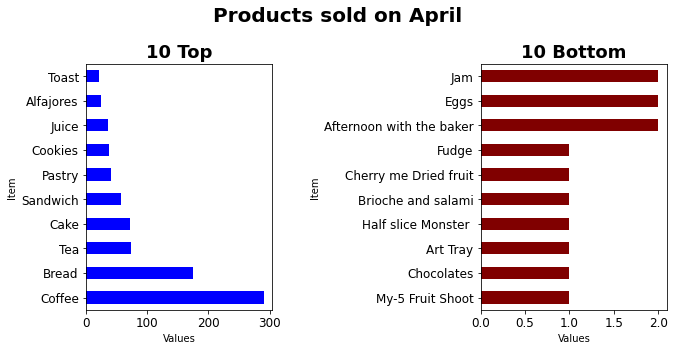

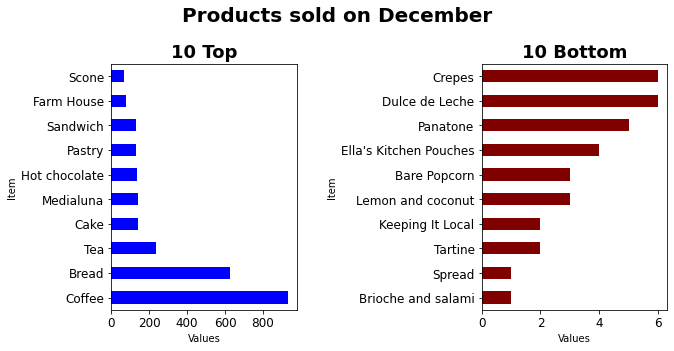

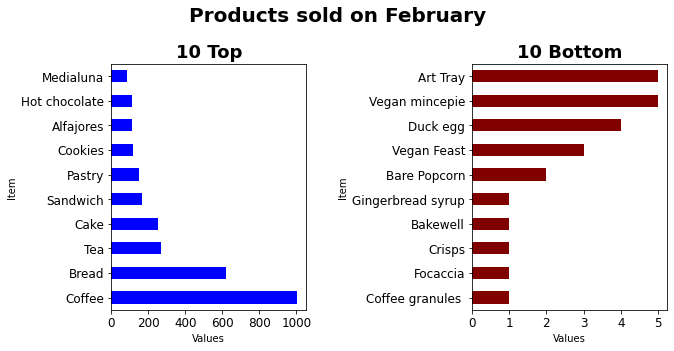

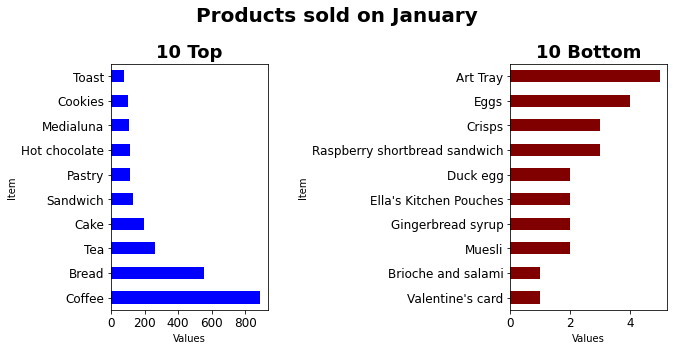

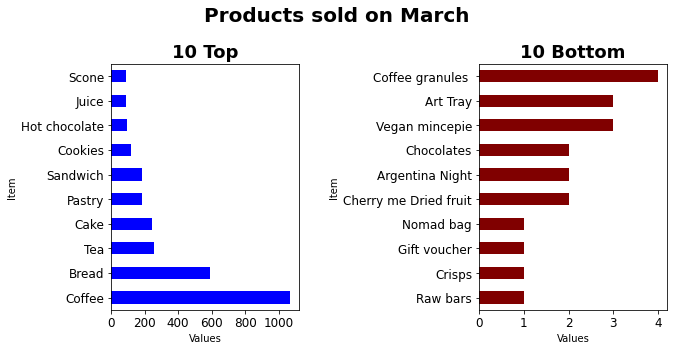

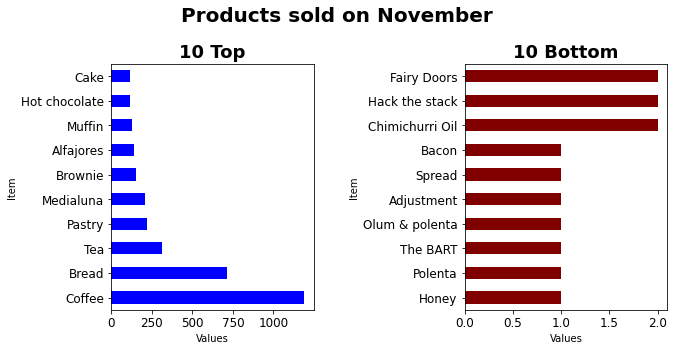

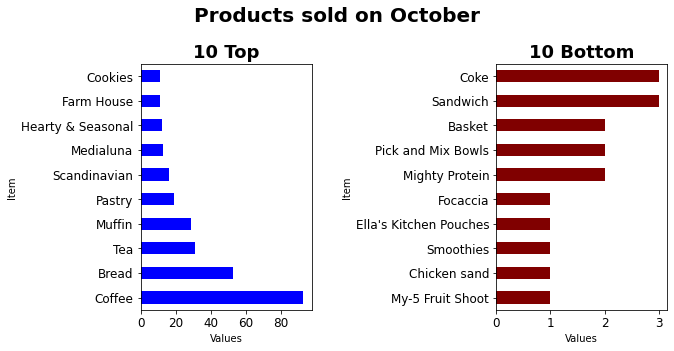

In [ ]:
#show 10 most selling each month
set_month = list(set(df['Month']))
sort_month = sorted(set_month)
for i in range (len (sort_month)):
    month=df[df['Month']==sort_month[i]]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle("Products sold on " + str(sort_month[i]), fontsize=20, fontweight='bold',y=1.02)
    month['Item'].value_counts()[:10].plot(kind='barh',fontsize=12, ax=ax[0],color ='blue')
    month['Item'].value_counts(ascending=True)[:10].plot(kind='barh',fontsize=12, ax=ax[1],color ='maroon')
    ax[0].set_title('10 Top', fontsize=18, fontweight='bold')
    ax[1].set_title('10 Bottom', fontsize=18, fontweight='bold')
    ax[0].set(xlabel="Values", ylabel = "Item")
    ax[1].set(xlabel="Values", ylabel = "Item")
    fig.tight_layout(pad=3, h_pad=3.0)

Coffee is always the best selling product and followed by Bread and Tea in every month. Preferably for some products in the bottom 10 position which only sold 1 or 2 times, there is no need to sell these products especially if the product has a short expiration date. Or can be sold with a preorder system.

### **What was the Peak Selling Hour?**

In [ ]:
#Add coloumn section 
def section(hour):
    if hour >= 7 and hour<11:
        section = 'Morning'
    elif hour >= 11 and hour<=14:
        section = 'Afternoon'
    elif hour  >= 15 and hour<=18:
        section = 'Evening'
    else:
        section = 'Night'
        
    return section

df['Section'] = df['Hour'].apply(section)
df.sample(3)

,Date,Time,Transaction,Item,Hour,Month,Day_name,Date_of_month,Section
4514,2016-11-26,2022-03-25 16:07:29,2152,Alfajores,16,November,Saturday,26,Evening
19285,2017-03-25,2022-03-25 13:56:28,8795,Spanish Brunch,13,March,Saturday,25,Afternoon
4111,2016-11-24,2022-03-25 09:55:27,1948,Coffee,9,November,Thursday,24,Morning


In [ ]:
peaksection = df.groupby('Section')['Item'].count().sort_values(ascending=False)
peaksection

Section
Afternoon    11213
Morning       5301
Evening       3908
Night           85
Name: Item, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['Afternoon','Morning','Evening','Night'],
                values=peaksection, title="Peak Selling Section",titlefont=dict(size=20), textinfo='label+percent', marker=dict(colors=px.colors.sequential.Teal), hole=.5)])
fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), font=dict(size=13), showlegend=False)
fig.show()

Every day, the bakery appears to make the majority of its sales in the afternoon, accounting for over 56% of total sales. Following that, sales fall sharply. The bakery, on the other hand, generates a good number of sales in the morning.

In [ ]:
timesection = df.groupby('Hour')['Item'].count().sort_values(ascending=False)
timesection

Hour
11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      48
7       24
20      22
22       8
23       3
21       3
1        1
Name: Item, dtype: int64

In [ ]:
fig = px.bar(timesection, color=timesection, color_continuous_scale=px.colors.sequential.Teal, title='Peak Selling Hour')
#fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=-45, plot_bgcolor='grey', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=True, title='Counts')
fig.update_xaxes(title='Time')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

* Lunchtime is the busiest time of the year with the most transactions is at 10 a.m - 12 p.m, peaking at 11 a.m with as many transactions as 3102. So if bakery employees work in shifts, the allocation of employees at lunch time should be more than dinner time.
* One-time transaction was detected at 1 a.m. This could be a transaction outside the bakery's operating hours. So let's check it.

In [ ]:
#Check the once transaction
df[df['Hour']==1]

,Date,Time,Transaction,Item,Hour,Month,Day_name,Date_of_month,Section
8561,2017-01-01,2022-03-25 01:21:05,4090,Bread,1,January,Sunday,1,Night


It turns out that the transaction at 01:21:05 a.m occurred on January 1, 2017. Now let's check the transactions on that date.

In [ ]:
#Check the transactions on that date
df[(df['Date_of_month']==1) & (df['Month']=='January')]

,Date,Time,Transaction,Item,Hour,Month,Day_name,Date_of_month,Section
8561,2017-01-01,2022-03-25 01:21:05,4090,Bread,1,January,Sunday,1,Night


It's solved, why there is one transaction at 01:21:05 a.m on 1st January. The transaction was carried out by bakery employee after the New Year party was over, and on that date, the bakery was closed.

### **How was Monthly Sales?**

In [ ]:
monthsale = df.groupby('Month')['Item'].count().sort_values(ascending=False)
monthsale

Month
November    4436
March       3944
February    3906
January     3356
December    3339
April       1157
October      369
Name: Item, dtype: int64

In [ ]:
fig = px.bar(monthsale, color=monthsale, color_continuous_scale=px.colors.sequential.Teal, title='Monthly Sales')
#fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=-45, plot_bgcolor='grey', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=True, title='Counts')
fig.update_xaxes(title='Month')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

We can observe that the largest sales occur in November due to the Thanksgiving event and the approaching Christmas and New Year's celebrations.

### **How was Weekly Sales?**

In [ ]:
weeksale = df.groupby('Day_name')['Item'].count().sort_values(ascending=False)
weeksale

Day_name
Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: Item, dtype: int64

In [ ]:
fig = px.bar(weeksale, color=weeksale, color_continuous_scale=px.colors.sequential.Teal, title='Most Productive Day')
#fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=-45, plot_bgcolor='grey', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=True, title='Counts')
fig.update_xaxes(title='Day')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

For obvious reasons, sales are expected to be high during the weekend, particularly on Saturday, implying that visitors are celebrating a holiday with family or friends. The remainder of the days, however, appear to be very consistent in terms of sales.

# **Data Preparation**

In [ ]:
df = df.groupby(['Transaction','Item']).size().reset_index(name='count')
basket = (df.groupby(['Transaction', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

#encode function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head(5)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Market Basket Analysis**

Now let's apply apriori. I'll set the lift metric's min threshold parameter to 1.0 in the association rules since if it's less than one, the two things are unlikely to be purchased together (see Theory above). Then sort the data by confidence to assess how likely an item is to be purchased if its antecedent is purchased.

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
31,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
37,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
36,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [ ]:
#Check rules length
len(rules.index)

42

**Interpretation** 

1. The recommendation_basket selected 42 itemsets sorted by lift > 1 and support > 1%
2. The support indicates how many transaction of the itemset (item_1 and item_2) occurs together.
3. The confidence indicates that the itemset has the likelihood of the item_2 is bought when someone buys the item_1
4. The lift shows how item_1 helps to increase the sales of the item_2 when buying those items together<br>
  Ex:
  * Toast and Coffee occurs nearly 2.4% of all transactions (support)
  The confidence is about 70% showing that the probability to happen this   
  transaction is high. Buying a toast shows that it increase in 47% the  
  probability to buy Coffee showing the influence of Toast over Coffee.

In [ ]:
#Recommendation of Market Basket
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.5) ]

#Recommendation of Market Basket Dataset
cols_keep = {'antecedents':'item_1', 'consequents':'item_2', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).drop(columns=cols_drop).sort_values(by=['lift'], ascending = False)
recommendation_basket['item_1'] = recommendation_basket['item_1'].str.join('()')
recommendation_basket['item_2'] = recommendation_basket['item_2'].str.join('()')
display(recommendation_basket)

,item_1,item_2,support,confidence,lift
30,Toast,Coffee,0.023666,0.704403,1.472431
29,Spanish Brunch,Coffee,0.010882,0.598837,1.251766
18,Medialuna,Coffee,0.035182,0.569231,1.189878
22,Pastry,Coffee,0.047544,0.552147,1.154168
0,Alfajores,Coffee,0.019651,0.540698,1.130235
17,Juice,Coffee,0.020602,0.534247,1.116750
25,Sandwich,Coffee,0.038246,0.532353,1.112792
7,Cake,Coffee,0.054728,0.526958,1.101515
26,Scone,Coffee,0.018067,0.522936,1.093107
13,Cookies,Coffee,0.028209,0.518447,1.083723


# **Conclusion**

Coffee is the bestseller of this bakery and it shows association with 13 other items. Besides coffee, let's look at the more interesting item correlations (format: antecedant(s) -> consequent):

  Pastry -> Bread<br>
  Cake -> Tea<br>
  (Tea + Coffee) -> Cake<br>
  Sandwhich -> Tea<br>
  Hot Chocolate -> Cake<br>

# **Business Strategy**
* The team (leader and staff) can work together to design strategies and training to encourage customers who purchased item 1 to buy item 2, doing cross-selling and increased store’s income. 
* The bakery might be interested in having a promotion of a free item, given the great chances of another item being sold as a result of it.
* The bakery could place their freshly baked bread near their pastries since customers who purchase pastries seem to also be enticed by bread. 

